* **I : Exploration**

In [183]:
Data <- read.csv(file.path("..","data","training_data.csv")) # load the data
Data <- na.omit(Data) # suppress all NAs values
Data<-Data[, -3] #remove sweet or sour
dim(Data)

head(Data)

[1]  708 4871

,Intensity,VALENCE.PLEASANTNESS,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,low,45,302.0,208.33,5.952,19.698,34.491,21.523,39.571,0.563,⋯,0,0,1,0,1,0,1,0,1,0
2,high,49,72.6,122.18,6.431,11.349,18.745,12.261,21.285,0.597,⋯,0,0,0,0,0,0,0,0,0,0
3,high,56,259.0,242.29,7.572,20.832,32.167,21.693,35.535,0.651,⋯,0,0,1,0,1,1,1,0,1,1
4,high,7,56.6,88.12,6.294,7.537,14.189,7.955,16.080,0.538,⋯,0,0,0,0,0,0,0,0,0,0
5,low,51,84.7,136.21,6.191,12.876,21.629,14.023,24.701,0.585,⋯,0,0,0,0,0,0,0,0,0,0
6,high,21,160.0,192.28,6.409,17.644,29.723,19.000,33.740,0.588,⋯,0,0,0,0,1,0,1,0,1,0


At first sight , we have 4870 predictors to predict pleansantness somes are qualitative (intensity is defined by High or low)
and other are numeric. We also remove SWEETORSOUR as it isn't part of our project
Let's now see the influence of intensity into Valence pleasantness in order to know if we have to keep it as a predictor.  

* Look at boxplot of pleansantness vs Intensity

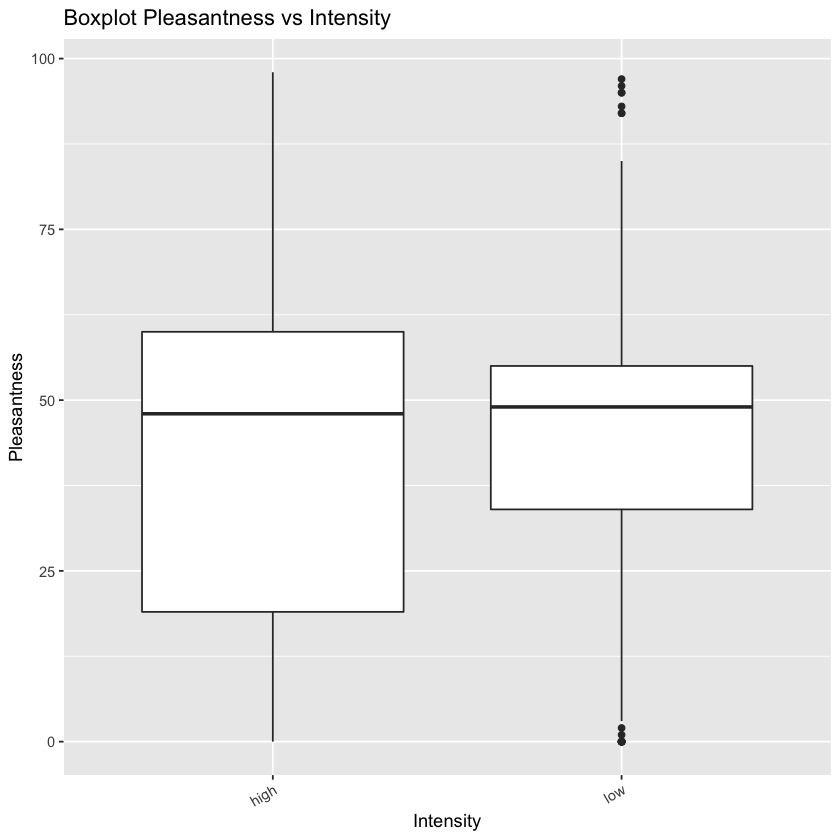

In [184]:
library(ggplot2)
ggplot(Data, aes( x=Intensity,VALENCE.PLEASANTNESS)) +
    geom_boxplot()+ 
    xlab(label = "Intensity") +
    ylab(label = "Pleasantness") +
    theme(axis.text.x = element_text(angle=30, hjust=1, vjust=1))+
    theme(legend.position="none")+
    ggtitle("Boxplot Pleasantness vs Intensity")


*INTERPRETATION* : 

We can see that the samples with high intensity are not considered very pleasant (pleasantness between 30 to 50). The samples that have a low intensity have a bigger range of pleasantness (20 to 60). Moreover, the mean pleasantness between intense and not intense smell is nearly the same (around 48).

As we see, Intensity seems to have a relation with pleasantness, so we have to change the Low, high Intensity value to binary value (low=0 and high =1) in order to used it as predictor

In [185]:
lookup <- c("low" = 1, "high" = 0)
Data$Intensity <- lookup[Data$Intensity]
head(Data)


,Intensity,VALENCE.PLEASANTNESS,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,45,302.0,208.33,5.952,19.698,34.491,21.523,39.571,0.563,⋯,0,0,1,0,1,0,1,0,1,0
2,1,49,72.6,122.18,6.431,11.349,18.745,12.261,21.285,0.597,⋯,0,0,0,0,0,0,0,0,0,0
3,1,56,259.0,242.29,7.572,20.832,32.167,21.693,35.535,0.651,⋯,0,0,1,0,1,1,1,0,1,1
4,1,7,56.6,88.12,6.294,7.537,14.189,7.955,16.080,0.538,⋯,0,0,0,0,0,0,0,0,0,0
5,0,51,84.7,136.21,6.191,12.876,21.629,14.023,24.701,0.585,⋯,0,0,0,0,0,0,0,0,0,0
6,1,21,160.0,192.28,6.409,17.644,29.723,19.000,33.740,0.588,⋯,0,0,0,0,1,0,1,0,1,0


* let's look at somes predictors in our data 

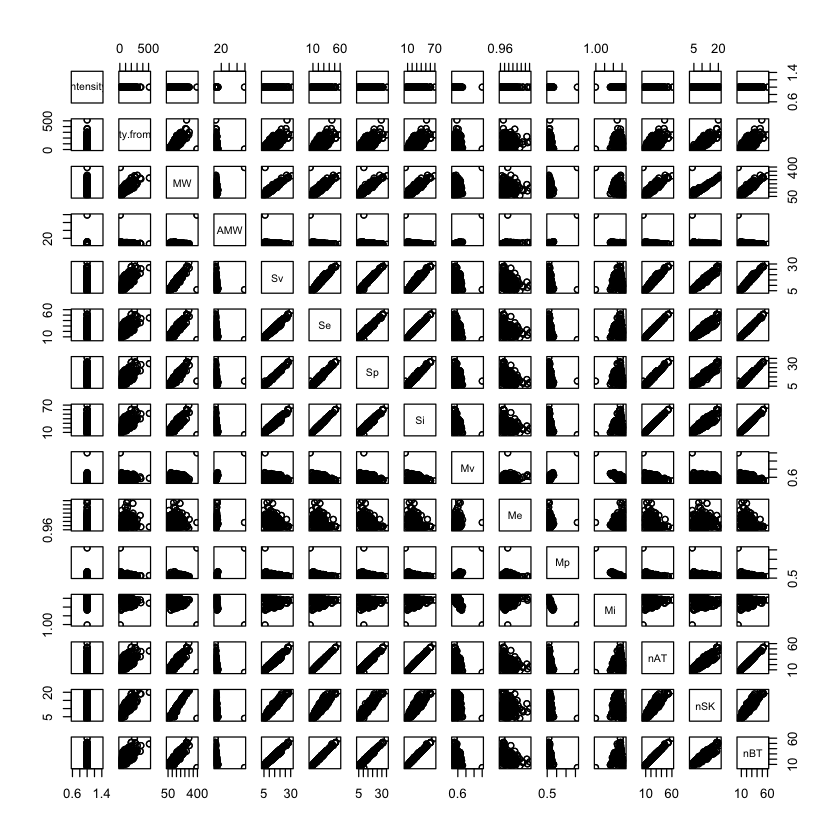

In [177]:
Data.x<-Data[, -2]
pairs(Data.x[, (1:15)] )

We can see some linear interaction bewteem SV, Se, Sp and Si, MW , nAT, nSK, nBTand Complexity from pubmed

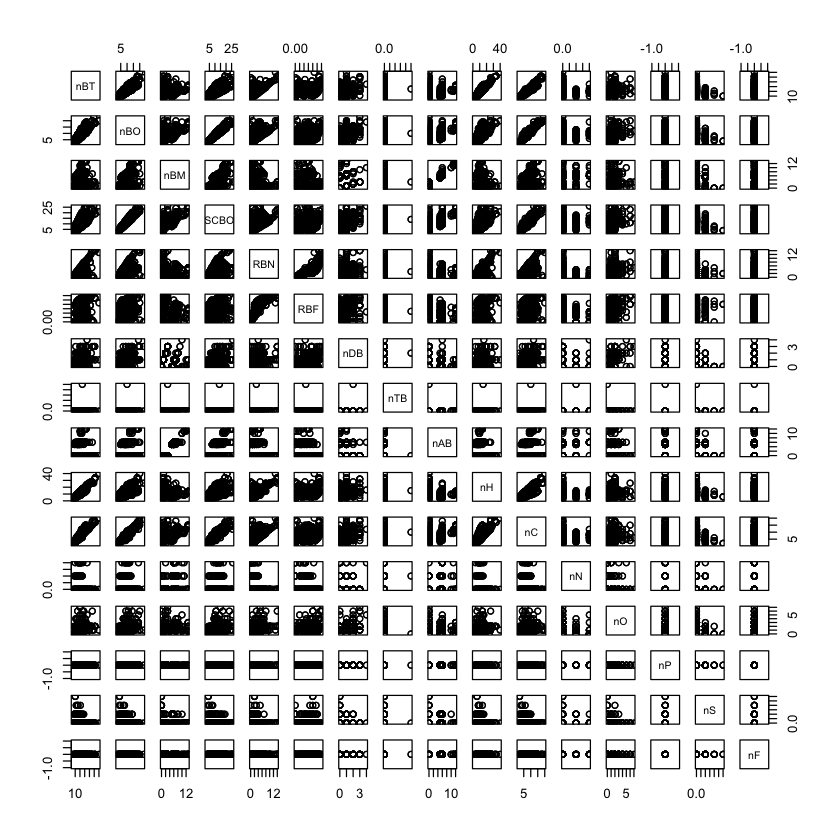

In [178]:
pairs(Data.x[, 15:30])

We can see some linear interaction bewteem nBT, nBO, SCBC, nH, nC. 

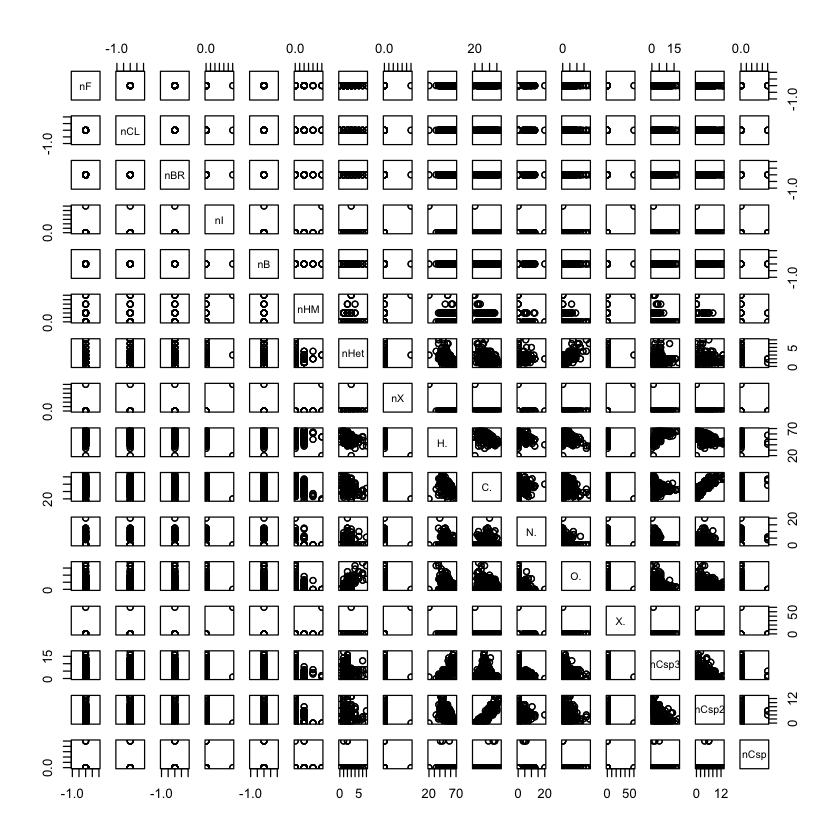

In [179]:
pairs(Data.x[, 30:45])

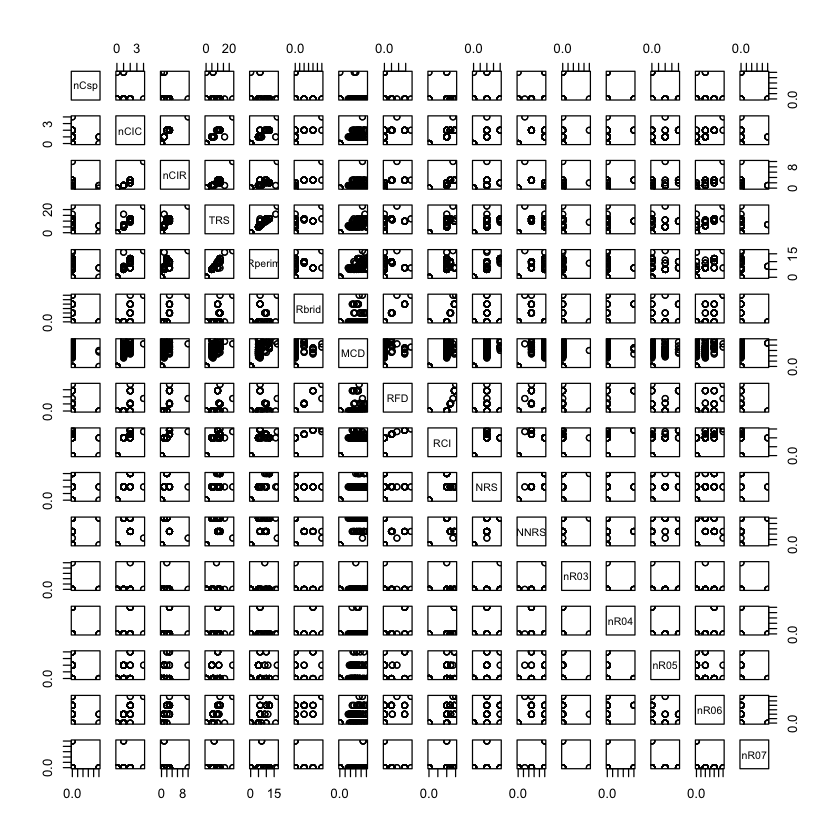

In [180]:
pairs(Data.x[, 45:60])

The visualization of 60 predictors of our data shows that it exists some linear relashionships between the predictors. 
Lets clean our data in order to reduce the number of predictors.

Statistical analysis of the data : we supress the predictors with a null variance (do not have any effect on pleasantness)  and the correlated columns (we supposed that a correlation under coefficient of 0.9 is accetable in order to keep as much information as possible).  
We also perform normalization of our data to perform linear prediction methods. 


In [187]:
library(caret)

## supress columns with var == 0 
data <- Data[, which(apply(Data, 2, var)!=0)] 

#supress column with correlation
data.pred<-data[, -2]
cormat<- cor(data.pred) 
highly_corr <- findCorrelation(cormat, 0.9) # find correlated columns 
data.x <- data.pred[,-c(highly_corr)] 
data_f<-data.frame(pleasantness=data[, 2], data.x)

#normilazer our data
data_final<-as.data.frame(scale(data_f))

dim(data_final)
head(data_final)


[1] 708 852

,pleasantness,Intensity,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.06138675,-0.9992935,-0.04988752,-0.2621597,1.3212848,0.06221626,-0.2921431,2.4449733,5.4540804,-0.03056319,⋯,-0.210203,-0.07532458,4.1960309,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
2,0.23351276,0.9992935,-0.71975646,-0.9580438,-1.1275886,-0.89537315,-0.3624004,0.2999410,-0.2222699,0.99985297,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
3,0.53473329,0.9992935,-1.32872823,0.2297583,0.0968481,1.01980567,0.3577364,1.3724571,-0.2222699,0.99985297,⋯,4.750587,-0.07532458,4.1960309,-0.05318703,2.1071008,7.6103928,2.5539556,-0.07532458,1.478546,10.80901225
4,-1.57381039,0.9992935,1.04626166,-0.6700918,0.0968481,0.06221626,1.2183877,-0.7725752,-0.2222699,-1.06097935,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
5,0.31957577,-0.9992935,-0.53706493,-0.5021197,-1.1275886,-0.89537315,-0.5029149,0.2999410,-0.2222699,0.99985297,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
6,-0.97136934,0.9992935,-0.41527058,0.8056624,0.0968481,0.06221626,-0.1165000,0.2999410,-0.2222699,0.99985297,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472


We finally have 851 predictor instead of 4870. 
We can now start to find linear regression !

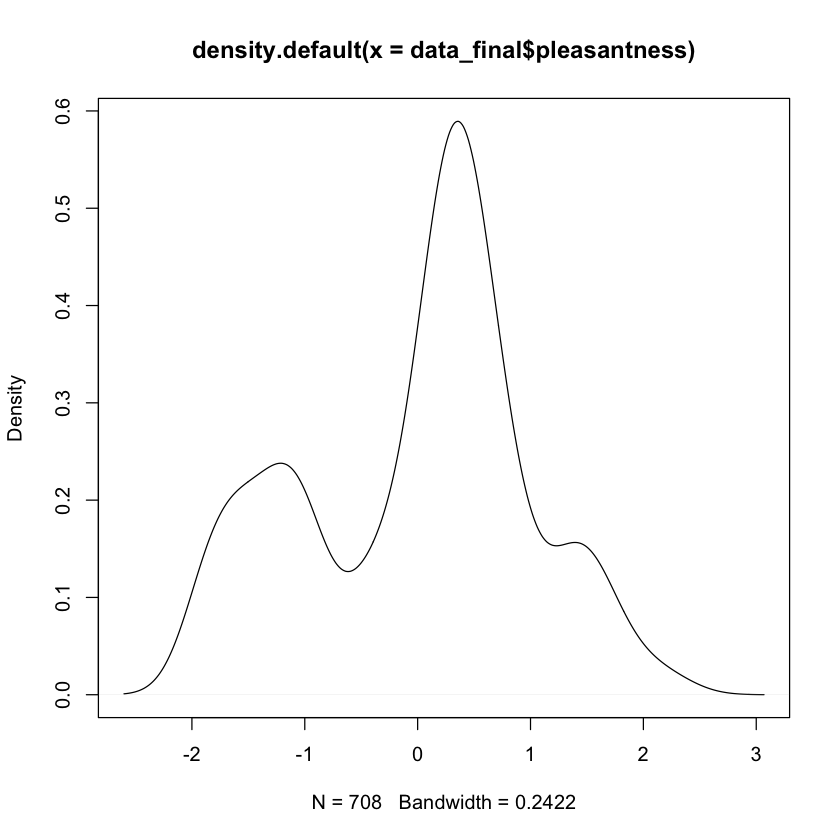

In [188]:
plot(density(data_final$pleasantness))

Pleasantness does not have a Gaussian curve shape. It may be difficult to find a linear regression relashionship with simple linear method ..

* **II : LINEAR METHODE**

* divide the data between a training and a test set : we choose to split in an half our final data.


In [205]:
#creation train/test set

set.seed(4)


#data final
data.x<-(data_final[, -1])
data.y<-(data_final[, 1])
data<-cbind(data.y, data.x)




#data.train
idx.train <- sample(nrow(data_final), nrow(data_final)*1/2)
X.train<- data.x[idx.train, ]
idx.zero.var <- apply(X.train, 2, var) ==0 # identify col with 0 variance 
data.train.x <- data.frame(X.train[, !idx.zero.var]) # supress the predictors with var == 0 

data.train.y<-data.y[idx.train]
data.train<-cbind(pleasantness=data.train.y, data.train.x)

#data.test
X.test<- data.x[-idx.train, ]
data.test.x <- data.frame(X.test[, !idx.zero.var])  # supress the predictors with var == 0 in the train set 
data.test.y<-data.y[-idx.train]
data.test<-(cbind(pleasantness=data.test.y, data.test.x))

head(data.train)
head(data.test)
dim(data.train)
dim(data.test)

,pleasantness,Intensity,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
504,-1.0574323,-0.9992935,-0.5370649,1.4055625,0.0968481,1.97739509,0.5860725,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,4.1960309,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
587,-1.1865269,-0.9992935,-0.4152706,-1.1140178,-1.1275886,-0.89537315,-0.5907365,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,1.478546,-0.09238472
71,0.3195758,-0.9992935,-0.6588593,0.7336744,1.3212848,0.06221626,-0.1516286,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
684,0.1904813,0.9992935,1.0462617,0.2537543,0.0968481,0.06221626,1.2183877,-0.7725752,-0.2222699,-1.060979,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
371,0.2335128,-0.9992935,0.3763927,0.6856824,0.0968481,0.06221626,-0.4502220,0.2999410,-0.2222699,0.999853,⋯,4.750587,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,1.478546,-0.09238472
698,0.4056388,-0.9992935,0.5590842,-1.5939379,-1.1275886,0.06221626,-1.2933090,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472


,pleasantness,Intensity,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.06138675,-0.9992935,-0.04988752,-0.2621597,1.3212848,0.06221626,-0.2921431,2.4449733,5.4540804,-0.03056319,⋯,-0.210203,-0.07532458,4.1960309,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
3,0.53473329,0.9992935,-1.32872823,0.2297583,0.0968481,1.01980567,0.3577364,1.3724571,-0.2222699,0.99985297,⋯,4.750587,-0.07532458,4.1960309,-0.05318703,2.1071008,7.6103928,2.5539556,-0.07532458,1.478546,10.80901225
6,-0.97136934,0.9992935,-0.41527058,0.8056624,0.0968481,0.06221626,-0.1165000,0.2999410,-0.2222699,0.99985297,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
7,0.53473329,-0.9992935,-1.99859717,-0.5981038,-1.1275886,-0.89537315,-0.5380435,1.3724571,-0.2222699,0.99985297,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,-0.3909965,-0.07532458,1.478546,-0.09238472
12,0.31957577,-0.9992935,1.10715884,-0.1781737,-1.1275886,-0.89537315,-0.3097075,-0.7725752,-0.2222699,-1.06097935,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
13,0.49170179,-0.9992935,0.98536449,0.2057623,-1.1275886,-0.89537315,-0.4502220,-0.7725752,-0.2222699,-1.06097935,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472


[1] 354 845

[1] 354 845

We get 2 new subset : both contain 844 predictors.

Run subset selection with foward regression method in order to reduce the number of predictors to perform multilinear regression 

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“595  linear dependencies found”


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement”


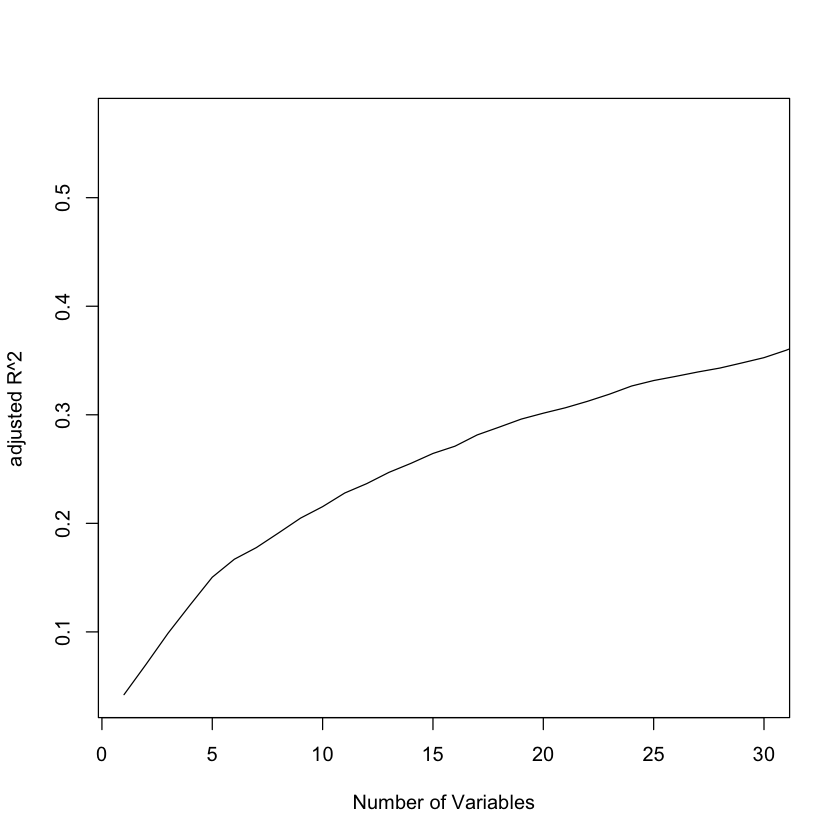

In [206]:
library(leaps)
regfit.fwd <- regsubsets(pleasantness~ ., data.train, method ='forward',  nvmax=845 )
regfit.fwd.summary <- summary(regfit.fwd)

# plot
plot(regfit.fwd.summary$adjr2, type = "l", xlim = c(1,30),
     xlab = "Number of Variables", ylab = "adjusted R^2")
adjr2.max <- which.max(regfit.fwd.summary$adjr2)
points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)

The value of the adjuste R-squared is too low, we choose not to use the outcome of this regression. 

 Lets try to run multilinear regression with all predictors (the 846 predictors) : 

In [207]:
fit1<-lm(pleasantness~. , data.train)
summary(fit1)


quality.of.fit <- function(fit, data) {
    RSS <- sum((data[, 1]- predict(fit, data))^2)
    TSS <- sum((data[, 1]- mean(data[, 1]))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}


Call:
lm(formula = pleasantness ~ ., data = data.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66215 -0.08923  0.00000  0.08063  1.66215 

Coefficients: (595 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)
(Intercept)     6.334e+01  9.531e+01   0.665    0.508
Intensity      -3.762e-02  6.182e-02  -0.609    0.544
Mi              5.343e+02  7.673e+02   0.696    0.488
RBF            -4.156e+02  5.980e+02  -0.695    0.489
nDB            -3.008e+02  4.489e+02  -0.670    0.504
nHet           -2.111e+03  3.130e+03  -0.675    0.501
O.             -7.501e+01  1.391e+02  -0.539    0.591
nCIR           -1.650e+03  2.467e+03  -0.669    0.505
RFD            -4.089e+02  6.130e+02  -0.667    0.506
NNRS           -7.133e+02  1.105e+03  -0.645    0.520
nR04            3.020e+02  4.423e+02   0.683    0.496
nR06            1.317e+03  1.955e+03   0.674    0.502
nR10            1.634e+02  2.284e+02   0.715    0.476
ARR             4.847e+02

NA values indicates that some of the variables are not defined because of singularity meaning that the variables are not linearly independent. 
If we  remove the variables that are giving NA, we  will obtain the same result for the rest of the variables. 
This is because the information given by those variables is already contained in the other variables and thus redundant.
We also decide to predict with and without intercept and see which models is best.

In [208]:
names<-rownames(summary(fit1)$coefficients)


#submodel 1 with intercept :

fit2<-lm((pleasantness)~ ., (data.train[,c('pleasantness', names[-1])])) #we remove the intercept 
summary(fit2)
quality.of.fit(fit2, data.train)
quality.of.fit(fit2, data.test)


#submodel 2  without intercept : 
fit3<-lm((pleasantness)~ .-1, (data.train[,c('pleasantness', names[-1])])) #we remove the intercept 
summary(fit2)
quality.of.fit(fit3, data.train)
quality.of.fit(fit3, data.test)

length(fit2$coefficient)
length(fit3$coefficient)



Call:
lm(formula = (pleasantness) ~ ., data = (data.train[, c("pleasantness", 
    names[-1])]))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66215 -0.08923  0.00000  0.08063  1.66215 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)
(Intercept)     6.334e+01  9.531e+01   0.665    0.508
Intensity      -3.762e-02  6.182e-02  -0.609    0.544
Mi              5.343e+02  7.673e+02   0.696    0.488
RBF            -4.156e+02  5.980e+02  -0.695    0.489
nDB            -3.008e+02  4.489e+02  -0.670    0.504
nHet           -2.111e+03  3.130e+03  -0.675    0.501
O.             -7.501e+01  1.391e+02  -0.539    0.591
nCIR           -1.650e+03  2.467e+03  -0.669    0.505
RFD            -4.089e+02  6.130e+02  -0.667    0.506
NNRS           -7.133e+02  1.105e+03  -0.645    0.520
nR04            3.020e+02  4.423e+02   0.683    0.496
nR06            1.317e+03  1.955e+03   0.674    0.502
nR10            1.634e+02  2.284e+02   0.715    0.476
ARR             4.847e+02  

Residual standard error:  0.869234841495902  R^2 =  0.773713477824414 
Residual standard error:  2242.29891732775  R^2 =  -1460994.62063014 



Call:
lm(formula = (pleasantness) ~ ., data = (data.train[, c("pleasantness", 
    names[-1])]))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66215 -0.08923  0.00000  0.08063  1.66215 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)
(Intercept)     6.334e+01  9.531e+01   0.665    0.508
Intensity      -3.762e-02  6.182e-02  -0.609    0.544
Mi              5.343e+02  7.673e+02   0.696    0.488
RBF            -4.156e+02  5.980e+02  -0.695    0.489
nDB            -3.008e+02  4.489e+02  -0.670    0.504
nHet           -2.111e+03  3.130e+03  -0.675    0.501
O.             -7.501e+01  1.391e+02  -0.539    0.591
nCIR           -1.650e+03  2.467e+03  -0.669    0.505
RFD            -4.089e+02  6.130e+02  -0.667    0.506
NNRS           -7.133e+02  1.105e+03  -0.645    0.520
nR04            3.020e+02  4.423e+02   0.683    0.496
nR06            1.317e+03  1.955e+03   0.674    0.502
nR10            1.634e+02  2.284e+02   0.715    0.476
ARR             4.847e+02  

Residual standard error:  0.866920535727234  R^2 =  0.772752571593131 
Residual standard error:  35.3907449441112  R^2 =  -366.449167645 


[1] 250

[1] 249

The error is huge for both model : they are  based on 249 predictors (or 250 with the intercept) and doesn't give us interesting predictor (p-values are very high) . 

Let's try to reduce the number of predictor with regularization

Lets try lassos regularization (L1 and L2 and PCR)  to perfome multilinear regression :

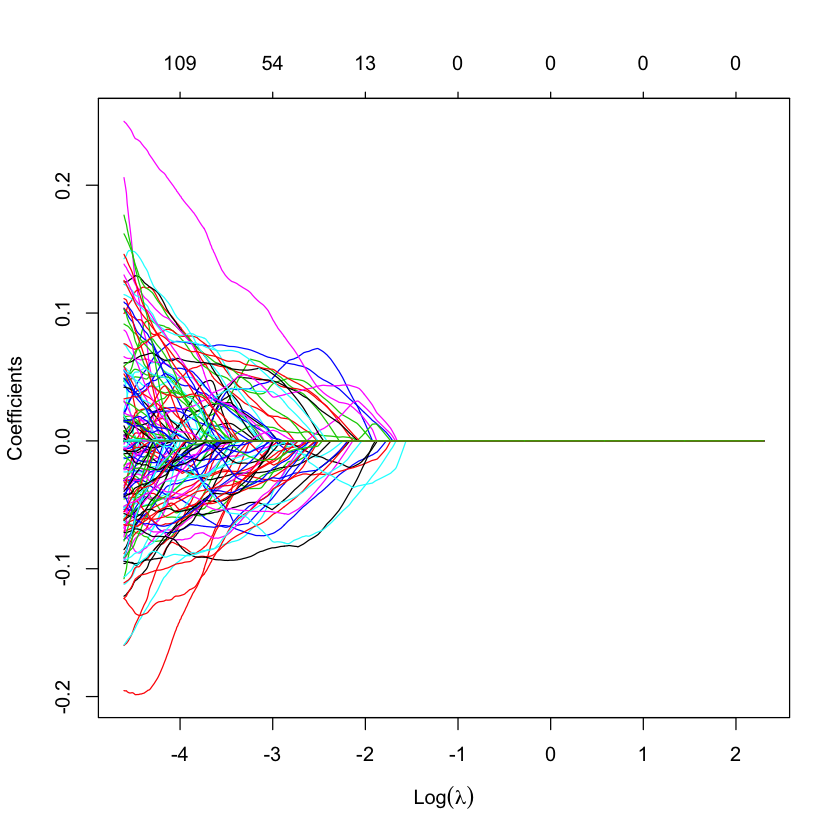

In [209]:
#L1 Regularization

library(glmnet)

grid =10^seq(1, -2, length = 800)
x.train<-as.matrix(data.train.x)
x.test<-as.matrix(data.test.x)

lasso.mod <- glmnet(x.train, data.train.y, alpha = 1, lambda = grid)
plot(lasso.mod, "lambda", xlab = parse(text = "Log(lambda)"))

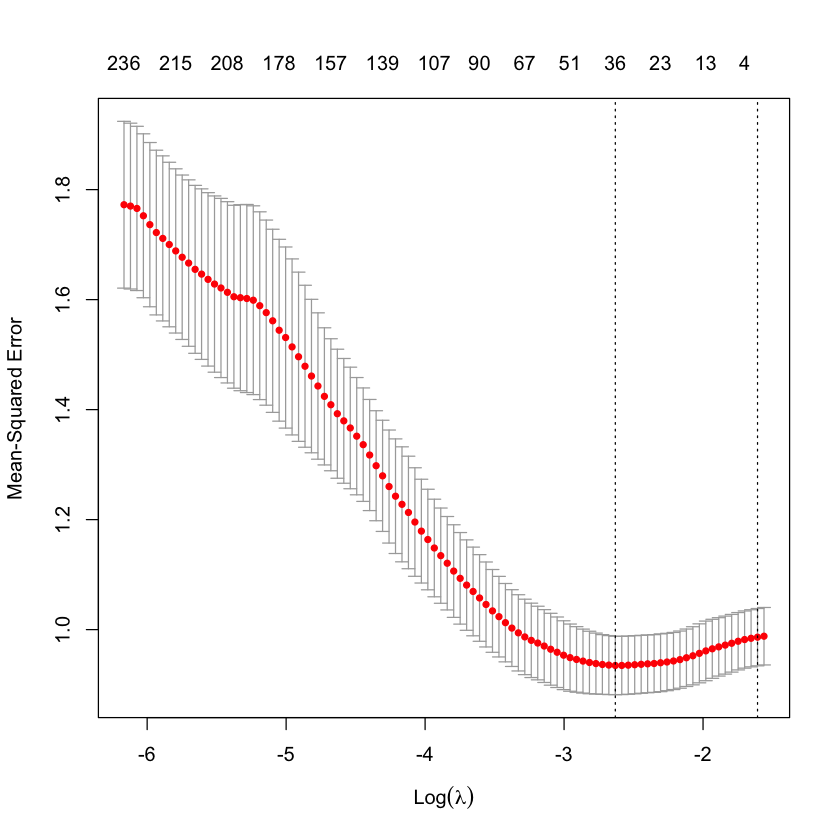

In [210]:
cv.lasso <- cv.glmnet(x.train, data.train.y, alpha = 1, nfold = 5)
plot(cv.lasso)

In [211]:
best.lasso <- glmnet(x.train, data.train.y, alpha = 1, lambda = cv.lasso$lambda.min)
bestlam = cv.lasso$lambda.min
length(colnames(data.train[, (which(abs(coef(best.lasso))>0))]))
lasso_pred1=predict(lasso.mod, s=bestlam, newx = x.train)
lasso_pred = predict(lasso.mod, s = bestlam, newx = x.test)
mean((lasso_pred1- data.train.y)^2)
mean((lasso_pred-data.test.y)^2)



[1] 37

[1] 0.7547882

[1] 0.8985526

--> Lasso regularization keep 37 predictor amoung the  of the data.train.x , the huge reduction of predictor clearly 
explaine the bad predictions of our models. However, it is the best submodel we found for linear model for now.

**INTERPRETATION :**


The resitual standard error is a little bit smaller than with multilinear regression on submodels, but is still quite high. 

In [25]:
#LASSO L2-REGULARIZATION 

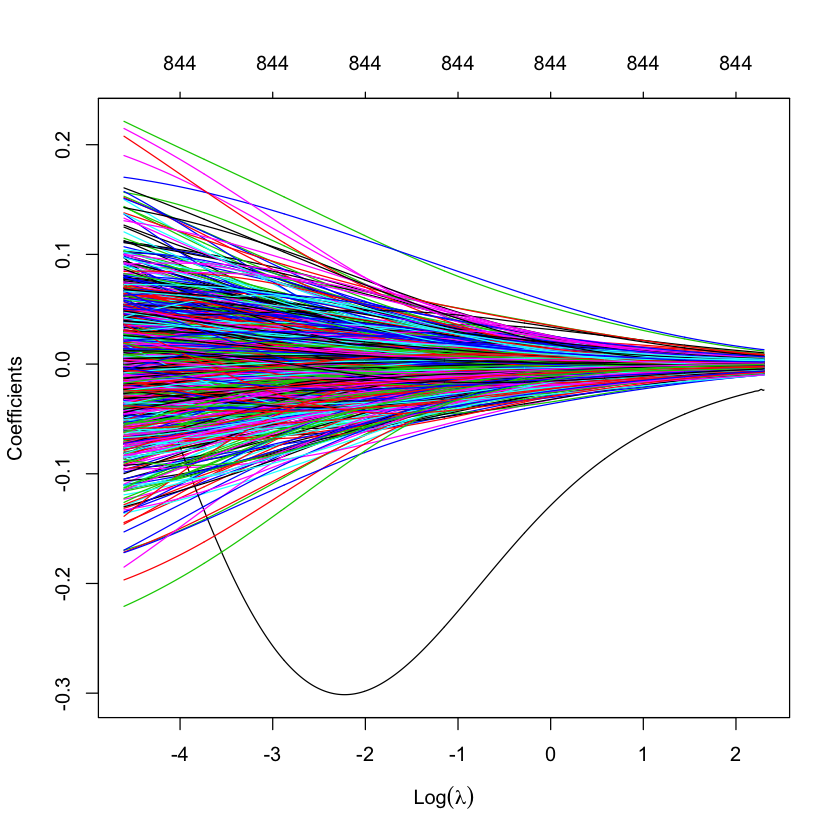

In [212]:
ridge.mod <- glmnet(x.train, data.train.y, alpha = 0, lambda = 10^seq(1, -2, length = 800))
plot(ridge.mod, "lambda", xlab = parse(text = "Log(lambda)"))

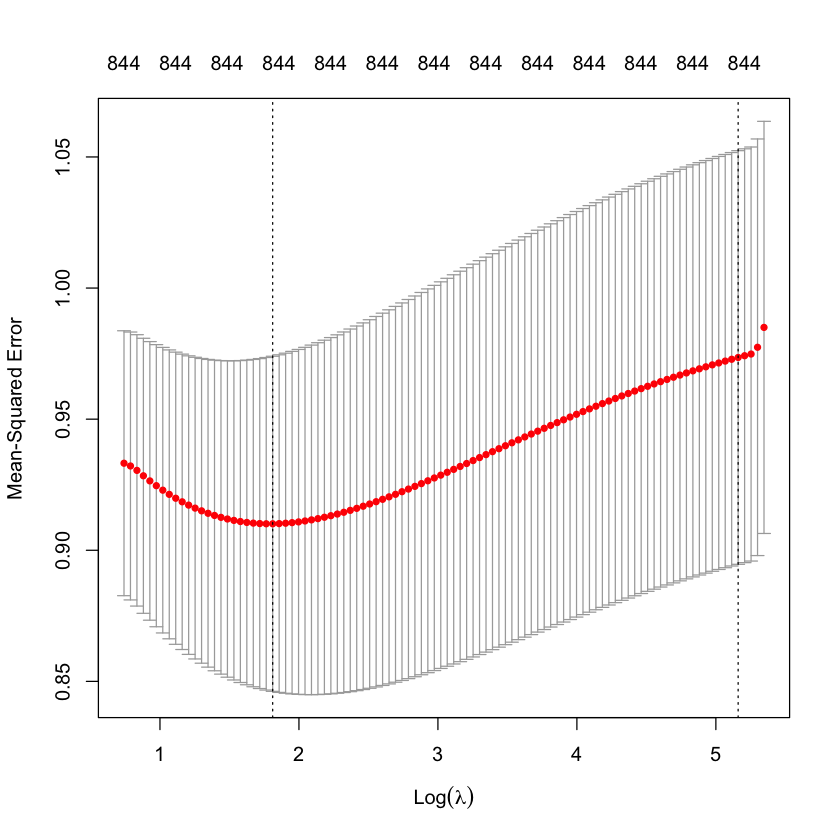

In [213]:
cv.lasso2 <- cv.glmnet(x.train, data.train.y,  alpha = 0, nfold = 5)
plot(cv.lasso2)


In [215]:
bestlam2 = cv.lasso2$lambda.min
best.lasso.1se <- glmnet(x.train, data.train.y, alpha = 0, lambda = bestlam2)


In [216]:
ridge_pred1 = predict(ridge.mod,  s = bestlam, newx = x.train)
ridge_pred = predict(ridge.mod,  s = bestlam, newx = x.test)
mean((ridge_pred1-data.train.y)^2)
mean((ridge_pred-data.test.y)^2)


[1] 0.2941817

[1] 1.714956

The MSE of the training set is much lower than the one found with L1-regularization. However, the MSE of the test set is a higher : this model clearly overfit the data.

We probably suppressed too much information by removing too many predictors. let's try PCA in order to get around dimensionality issue.


Let's perfom PCA on data.train :

In [217]:
prin_comp <- prcomp(data.train.x, scale. = T, center =T)
summary(prin_comp)


Importance of components:
                           PC1    PC2     PC3    PC4     PC5     PC6    PC7
Standard deviation     11.6660 9.4043 7.45421 6.6186 5.79106 5.28080 4.8958
Proportion of Variance  0.1613 0.1048 0.06584 0.0519 0.03974 0.03304 0.0284
Cumulative Proportion   0.1613 0.2660 0.33187 0.3838 0.42351 0.45655 0.4849
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.61936 4.47387 4.44213 4.19805 3.83687 3.70758 3.60703
Proportion of Variance 0.02528 0.02372 0.02338 0.02088 0.01744 0.01629 0.01542
Cumulative Proportion  0.51023 0.53395 0.55733 0.57821 0.59565 0.61194 0.62735
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     3.37954 3.28979 3.22309 3.03125 2.94637 2.93698 2.86014
Proportion of Variance 0.01353 0.01282 0.01231 0.01089 0.01029 0.01022 0.00969
Cumulative Proportion  0.64089 0.65371 0.66602 0.67691 0.68719 0.69741 0.70710
                          PC22   PC23 

In order to selecte the best number of Principal component we plot the proportion 
of variance explianed and the cumulative proportion variance explained by each PC

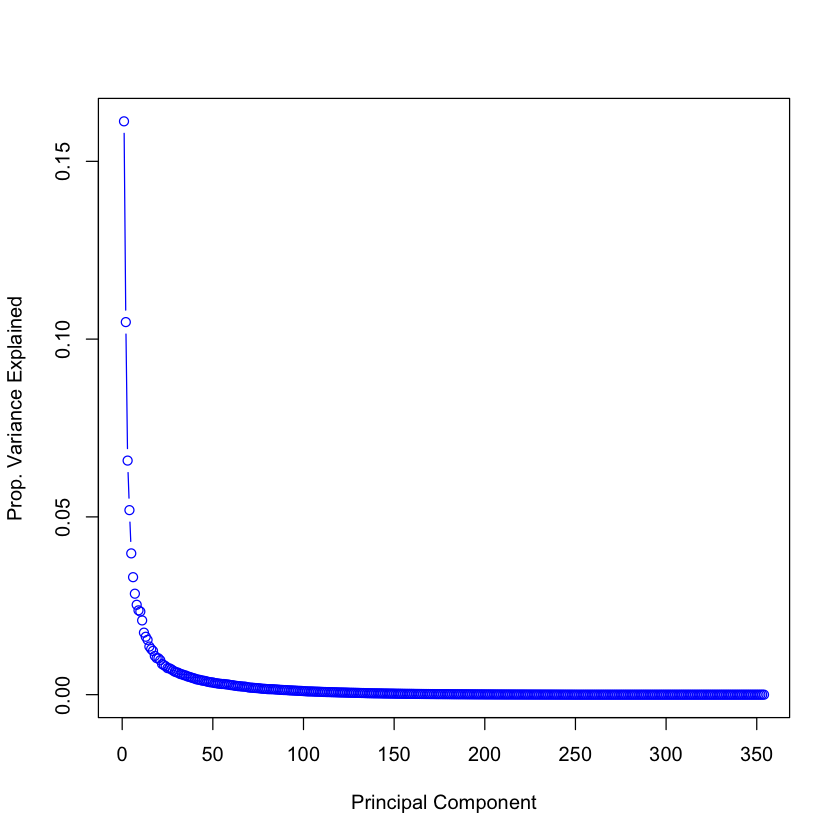

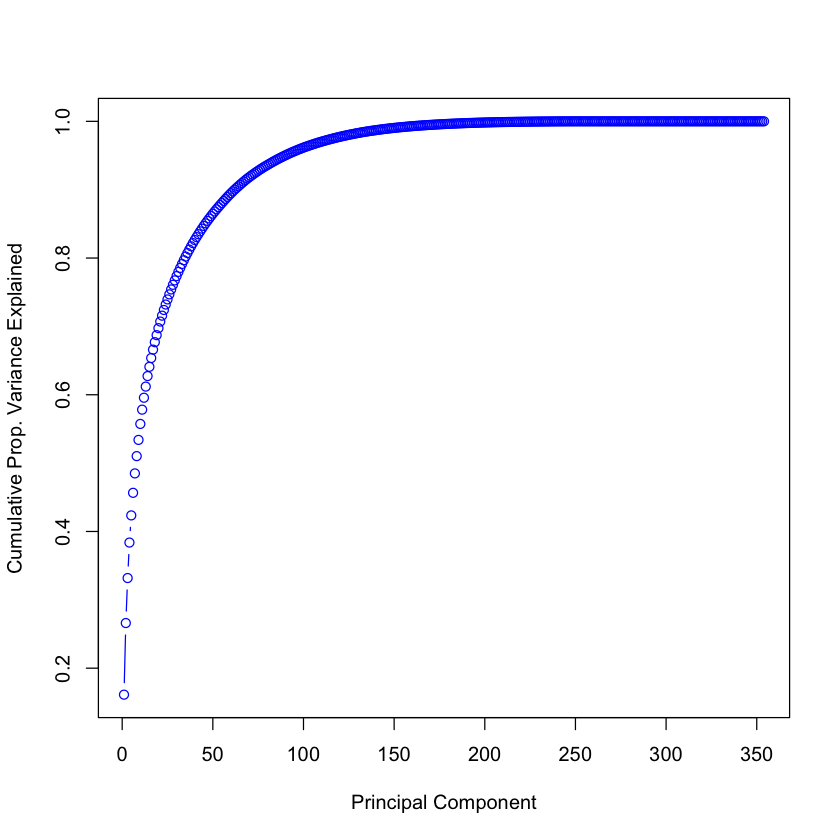

In [218]:
pca.var <- prin_comp$sdev^2
pca.vare <- pca.var / sum(pca.var)
plot(pca.vare, xlab = "Principal Component", ylab = "Prop. Variance Explained", col = "blue", type = "b")
plot(cumsum(pca.vare), xlab = "Principal Component", ylab = "Cumulative Prop. Variance Explained", col = "blue", type = "b")

In [219]:
(which(cumsum(pca.vare)>0.8))[1]

[1] 35

Let's take the 35 first components that explain 80% of the varience.

In [220]:
#add a training set with principal components
train.data <- data.frame(pleasantness = data.train.y, prin_comp$x)

#we are interested in first 35 PCAs

train.data <- train.data[,1:36]


linearmod<-lm(pleasantness ~ ., train.data)
summary(linearmod)
#transform test into PCA

test.data <- predict(prin_comp, data.test)
test.data <- data.frame(pleasantness = data.test.y, test.data)


#select the first 35 components
test.data <- test.data[,1:36]


rpart.prediction <- predict(linearmod, test.data)
rpart2.prediction <- predict(linearmod, train.data)

quality.of.fit <- function(fit, data) {
    RSS <- sum((data$pleasantness - predict(fit, data))^2)
    TSS <- sum((data$pleasantness- mean(data$pleasantness))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}

quality.of.fit(linearmod, train.data)
quality.of.fit(linearmod, test.data)


#training error  : 
1/length(train.data$pleasantness) * sum((train.data$pleasantness-rpart2.prediction )^2)

#test error : 

1/length(test.data$pleasantness) * sum((test.data$pleasantness-rpart.prediction )^2)


Call:
lm(formula = pleasantness ~ ., data = train.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2304 -0.6863  0.1496  0.5756  2.5727 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.0509328  0.0500741  -1.017  0.30986   
PC1          0.0056343  0.0042984   1.311  0.19087   
PC2         -0.0116628  0.0053321  -2.187  0.02945 * 
PC3          0.0002266  0.0067271   0.034  0.97315   
PC4         -0.0149791  0.0075764  -1.977  0.04890 * 
PC5         -0.0093798  0.0086590  -1.083  0.27952   
PC6          0.0010025  0.0094957   0.106  0.91599   
PC7         -0.0051148  0.0102425  -0.499  0.61786   
PC8          0.0300689  0.0108554   2.770  0.00594 **
PC9          0.0016390  0.0112084   0.146  0.88383   
PC10        -0.0082742  0.0112885  -0.733  0.46411   
PC11        -0.0388779  0.0119448  -3.255  0.00126 **
PC12         0.0015698  0.0130693   0.120  0.90447   
PC13         0.0186622  0.0135250   1.380  0.16861   
PC14        -0.0216901  

Residual standard error:  0.942139443081437  R^2 =  0.18715340830351 
Residual standard error:  1.0175202055819  R^2 =  0.0800975734122518 


[1] 0.7973596

[1] 0.9300578

Knowing the we are working of normalized data, the Residual Standard Errors as well as the Mean Squared Errors of the training and test set are too high. 
To conclude, it is with Lasso Regularization that we found the smallest error. 



Lasso L1 regularization gives us the best result. 

Overall, the MSE of the linear methods we tested is very high.Those methods do not predict the pleasantness efficiently. 

* III : NON LINEAR METHOD (TREE)

In [238]:
library(caret)

set.seed(200)

Data <- read.csv(file.path("..","data","training_data.csv")) # load the data
Data <- na.omit(Data) # suppress all NAs values
Data<-Data[, -3] #remove sweet or sour
lookup <- c("low" = 1, "high" = 0)
Data$Intensity <- lookup[Data$Intensity]



data <- Data[, which(apply(Data, 2, var)!=0)] # supress columns with var == 0 
data.pred<-data[, -2]
cormat<- cor(data.pred) 
highly_corr <- findCorrelation(cormat, 0.8) # find correlated columns 
data.x <- data.pred[,-c(highly_corr)] # suppress correlated columns 
data_final<-data.frame(data$VALENCE.PLEASANTNESS, data.x)



data.x<-(data_final[, -1])
data.y<-(data_final[, 1])
data<-cbind(data.y, data.x)



idx.train <- sample(nrow(data_final), nrow(data_final)*1/2)
X.train<- data.x[idx.train, ]
idx.zero.var <- apply(X.train, 2, var) ==0 # identify col with 0 variance 
data.train.x <- data.frame(X.train[, !idx.zero.var]) # supress the predictors with var == 0 


data.train.y<-data.y[idx.train]
data.train<-cbind(pleasantness=data.train.y, data.train.x)


X.test<- data.x[-idx.train, ]
data.test.x <- data.frame(X.test[, !idx.zero.var])  # supress the predictors with var == 0 in the train set 


data.test.y<-data.y[-idx.train]
data.test<-(cbind(pleasantness=data.test.y, data.test.x))

head(data.train)
head(data.test)

,pleasantness,Intensity,nDB,RFD,nR04,nR06,nR10,D.Dtr05,D.Dtr07,D.Dtr09,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
166,45,1,1,0.571,0,1,0,43.019,0,0,⋯,0,0,0,0,0,0,0,0,1,0
370,50,1,1,0.000,0,0,0,0.000,0,0,⋯,0,0,0,0,0,0,0,0,0,0
232,53,1,1,0.000,0,2,0,0.000,0,0,⋯,1,0,1,0,1,1,1,0,1,1
556,42,1,1,0.000,0,0,0,0.000,0,0,⋯,0,0,0,0,0,0,0,0,0,0
181,48,0,2,0.000,0,0,0,0.000,0,0,⋯,0,0,0,0,0,0,0,0,1,0
538,6,0,1,0.000,0,0,0,0.000,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,pleasantness,Intensity,nDB,RFD,nR04,nR06,nR10,D.Dtr05,D.Dtr07,D.Dtr09,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,45,0,2,0.571,1,2,0,0,0,0,⋯,0,0,1,0,1,0,1,0,1,0
4,7,1,1,0.000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,21,1,1,0.000,0,1,0,0,0,0,⋯,0,0,0,0,1,0,1,0,1,0
8,52,0,0,0.000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,53,0,4,0.000,0,1,0,0,0,0,⋯,1,0,1,0,1,1,1,1,1,1
12,51,0,0,0.000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In this part we will work with 2 subset : the data train and the test set which contains both 480 predictors. 

Perform descision tree on our data : 

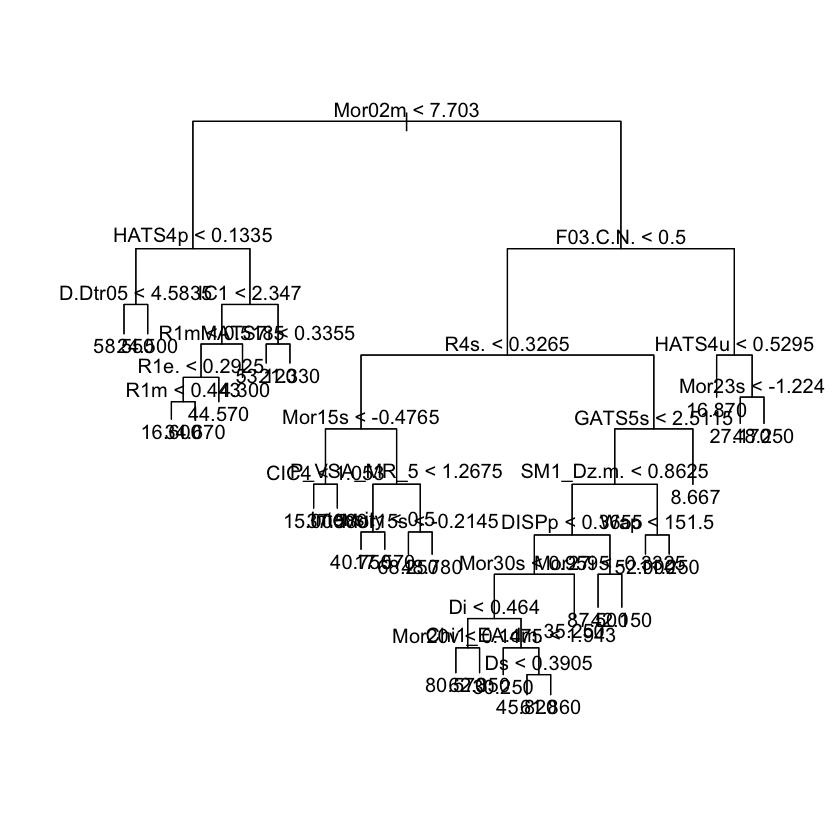

In [239]:
#DESCISION TREES 

library(tree)
p_tree <- tree(data.train$pleasantness ~ ., data.train, minsize = 1)
plot(p_tree)
text(p_tree)


In [240]:
mean((data.test[,'pleasantness']) - predict(p_tree, data.test))^2

[1] 0.7416961

In [229]:
# Prunned TREE

Use prunned tree to find the optimal size of tree to predict our data : 

In the following we define some functions to fit the data and run 6-fold cross-validation. We run 6-fold cross-validation,
because our training data has size 426, which is a multiple of 6.

In [241]:
# find the optimal tree size
p.train <- function(train) {
    tree(data.y ~ ., data, subset = train)
}

p.evaluate <- function(tree, set) {
    sapply(2:100, function(i) mean((data[set,'data.y']) - predict(prune.tree(tree, best = i), data[set,]))^2) # We compute the mean squared error for all trees with 2 to 100 leaf nodes.
}
p.cv <- function(train) {
    res <- sapply(1:6, function(v) {
                            idx.test <- seq((v-1)*71 + 1, v*71) # fold index : divide into 6 cross-fold 
                            this.fold.test <- train[idx.test]   # validation
                            this.fold.train <- train[-idx.test] # training
                            tree <- p.train(this.fold.train)
                            p.evaluate(tree, this.fold.test)
                        })
    rowMeans(data.frame(res))
}
           
p.train.and.evaluate <- function() { # method to evaluate the model of training, test and using cross-validation
    train <- sample(nrow(data), 426)
    tree <- p.train(train)
    list(train = p.evaluate(tree, train),
         test = p.evaluate(tree, -train),
         cv = p.cv(train),
         tree = tree)
}
set.seed(1)
res <- replicate(3, p.train.and.evaluate())# we run everything for 3 different training sets
           


Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best

Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-lengt

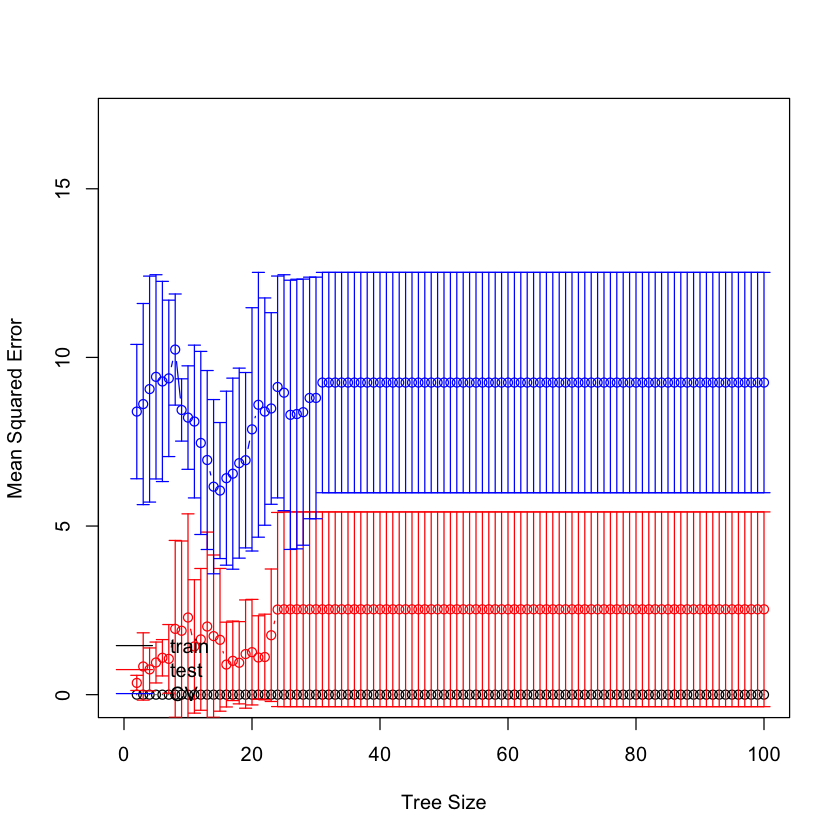

In [242]:

std.plot <- function(data, x = 2:100, ...) {
    df <- data.frame(data)
    m <- rowMeans(df)
    std <- sqrt(rowMeans((df - m)^2))
    points(x, m, type = "b", ...)
    arrows(x, m - std, x, m + std, length=0.05, angle = 90,  code=3, ...)
}
plot(c(),ylim = c(0,17), xlim = c(0, 100), xlab = "Tree Size", ylab = "Mean Squared Error")
std.plot(res[1,])
std.plot(res[2,], col = "red")
std.plot(res[3,], col = "blue")
legend("bottomleft", c("train", "test", "CV"), bty = 'n',
                     col = c("black", "red", "blue"), lty = 1)


We can deduce from the plot above that the optimal tree size is around 20.

lets plot this tree. 

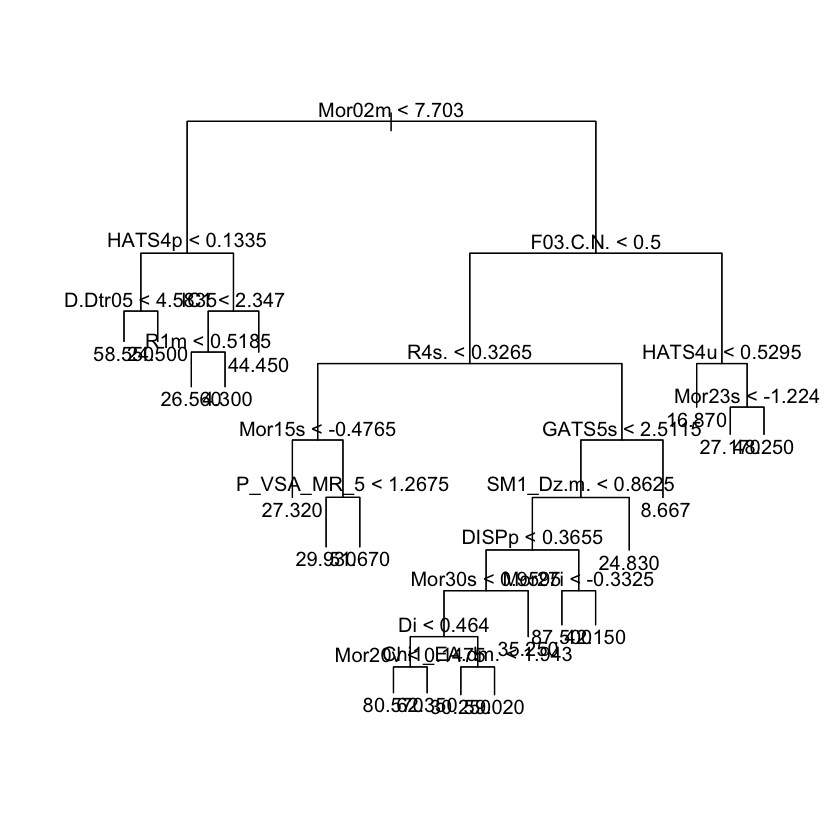

In [243]:
final.tree <- prune.tree(p_tree, best = 20)
plot(final.tree)
text(final.tree)


We can see that Eig05_EA.dm, G2i, MAXDN, Mor28s, GOS are important moleculre feature in this model. 

In [269]:
# Mean MSE for training set 
df <- data.frame(res[1,])
m <- rowMeans(df)
mean(m)

# Mean MSE for test set 
df <- data.frame(res[2,])
m <- rowMeans(df)
mean(m)

# Mean MSE for CV set 
df <- data.frame(res[3,])
m <- rowMeans(df)
mean(m)

[1] 3.358945e-31

[1] 2.260874

[1] 8.933445

In [271]:
Data.kaggle1<- read.csv(file.path("..","data","test_data.csv"))
lookup <- c("low" = 1, "high" = 0)
Data.kaggle1$Intensity <- lookup[Data.kaggle1$Intensity]
Data.kaggle.x<-Data.kaggle1[, colnames(Data.kaggle1)%in%colnames(data.train.x)]
pred<-predict(final.tree, Data.kaggle.x)
result<- data.frame('Id'=Data.kaggle1$Id, 'VALENCE.PLEASANTNESS' = pred)
write.csv(x=result, 'pruuned_tree.csv', row.names = FALSE )

The MSE found for training set is very low. The one for the test set is low but a lot higher than the MSE for training set (which is normal). This method is maybe still a little bit too flexible. The MSE for the cross validation set is the highest. However, regarding those MSE values, this method is quite efficient to predict valence pleasantness of our 2 data sets.
Consequently, we decided to test this model to predict pleasantness using the test_data and see the result.

Tree based methods are simple and useful for interpretations but they are not always accurate enough for prediction so we decide to perfom Gradient Boosting to find the best model for prediction


In [37]:
#Boositing Tree

In [246]:
library(xgboost)
library(Matrix)

plea.train.x <- sparse.model.matrix( pleasantness~ . -1, data = data.train)
plea.test.x = sparse.model.matrix(pleasantness ~ . -1, data = data.test)
plea.train.y =data.train.y
plea.test.y =data.test.y

Let's test different eta (shrinkage parameter ) values for boosting with RSS as a loss function.

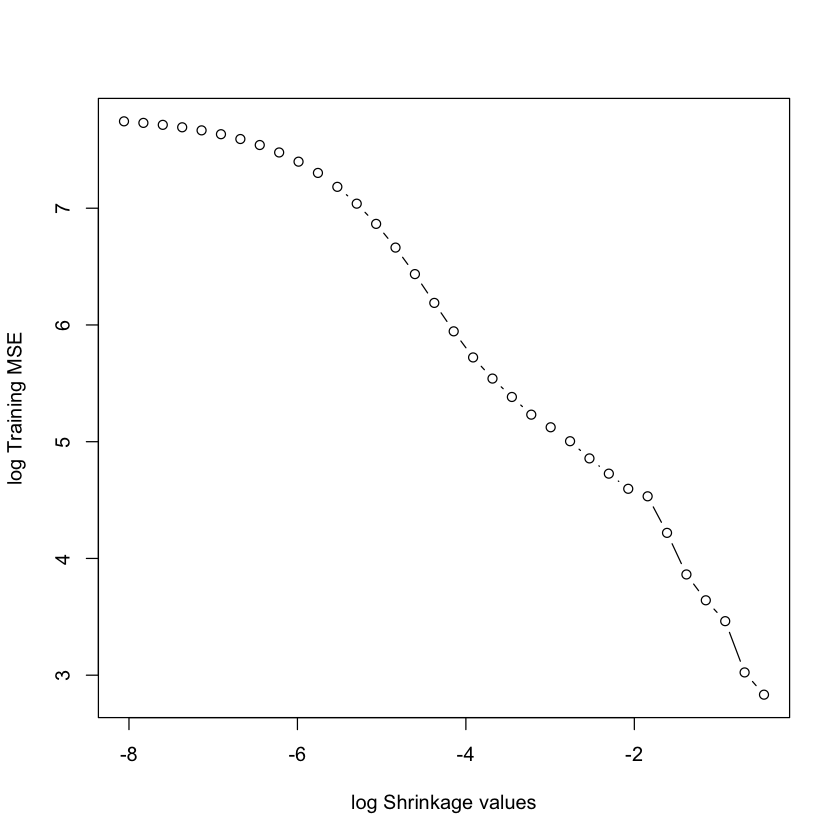

In [248]:
set.seed(1)
pows <- seq(-3.5, -0.2, by = 0.1)
lambdas <- 10^pows
train.err <- rep(NA, length(lambdas))
test.err <- rep(NA, length(lambdas))
for (i in 1:length(lambdas)) {
  boost.pleas <- xgboost(plea.train.x,
                           label=plea.train.y,
                           eta=lambdas[i],
                           objective="reg:squarederror",
                           max.depth=3,
                           nrounds=100,
                           verbose = 0)
  pred.train <- predict(boost.pleas, plea.train.x)
  pred.test <- predict(boost.pleas, plea.test.x)
  train.err[i] <- mean((pred.train - plea.train.y)^2)
  test.err[i] <- mean((pred.test - plea.test.y)^2)
}
plot(log(lambdas), log(train.err), type="b", xlab="log Shrinkage values", ylab="log Training MSE")

The training MSE decreases with increasing λ, over a wide range of λvalues.

In [249]:
min(train.err)
lambdas[which.min(train.err)]

[1] 16.9991

[1] 0.6309573

--> optimal shrinkage for data train is  λ≈0.63 and give us 

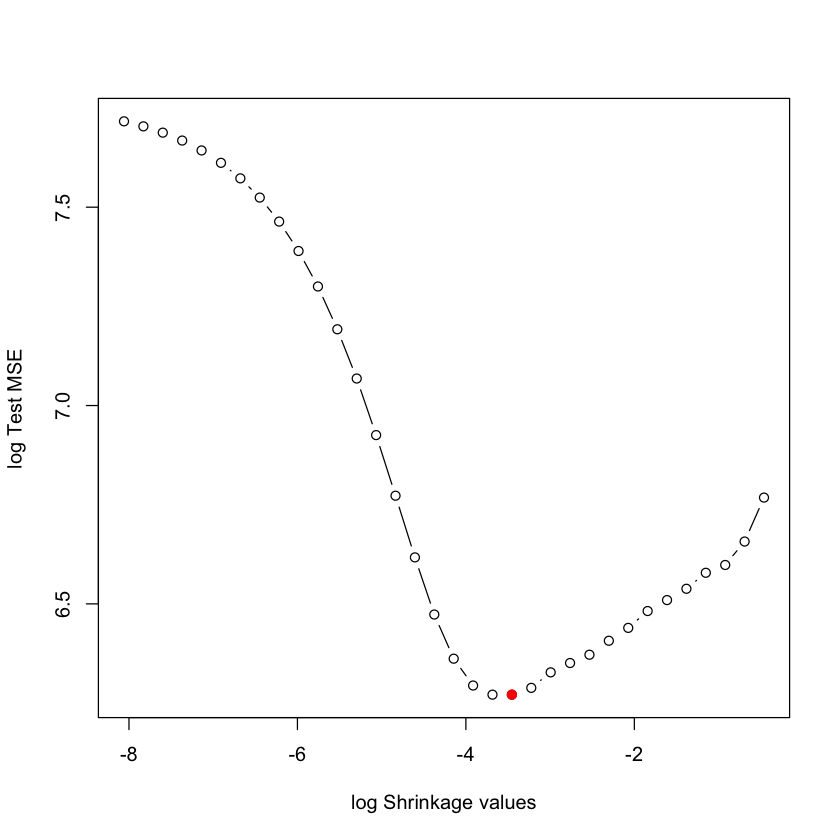

In [250]:
plot(log(lambdas), log(test.err), type="b", xlab="log Shrinkage values", ylab="log Test MSE")
points(log(lambdas[which.min(test.err)]), log(min(test.err)), col="red", pch=19)

In [251]:
min(test.err)
lambdas[which.min(test.err)]

[1] 529.0824

[1] 0.03162278

-->  Differently to the training error, the test MSE reaches a minimum when λ
 is optimal, and thereafter increases slowly. The optimal shrinkage is λ=0.32.
Let's use it for our gradient boosting but this time with linear regression as loss function. Morevoer, we decide to run with 10000 tree so this part might take around 4 minutes to run. 

In [252]:
boost.pleas = xgboost(plea.train.x, label = plea.train.y,
                      objective = "reg:linear",
                      eta = 0.032,
                      max_depth = 4,
                      nround = 5000)



[1]	train-rmse:47.975094 
[2]	train-rmse:46.693993 
[3]	train-rmse:45.455753 
[4]	train-rmse:44.260700 
[5]	train-rmse:43.107315 
[6]	train-rmse:41.994843 
[7]	train-rmse:40.908787 
[8]	train-rmse:39.863239 
[9]	train-rmse:38.857014 
[10]	train-rmse:37.890167 
[11]	train-rmse:36.956169 
[12]	train-rmse:36.067112 
[13]	train-rmse:35.191288 
[14]	train-rmse:34.348724 
[15]	train-rmse:33.535786 
[16]	train-rmse:32.727322 
[17]	train-rmse:31.969858 
[18]	train-rmse:31.238302 
[19]	train-rmse:30.512085 
[20]	train-rmse:29.833448 
[21]	train-rmse:29.158499 
[22]	train-rmse:28.541050 
[23]	train-rmse:27.903574 
[24]	train-rmse:27.306461 
[25]	train-rmse:26.755518 
[26]	train-rmse:26.193665 
[27]	train-rmse:25.684132 
[28]	train-rmse:25.142666 
[29]	train-rmse:24.640614 
[30]	train-rmse:24.161118 
[31]	train-rmse:23.680353 
[32]	train-rmse:23.217876 
[33]	train-rmse:22.812992 
[34]	train-rmse:22.398729 
[35]	train-rmse:22.001345 
[36]	train-rmse:21.607246 
[37]	train-rmse:21.220512 
[38]	train

In [253]:
yhat.boost = predict(boost.pleas, plea.test.x)
(mean(yhat.boost -  plea.test.y)^2)


[1] 2.868673

As we can see this is the lowest test error we fin amoung all our model ! let's see which predictor are important in our model

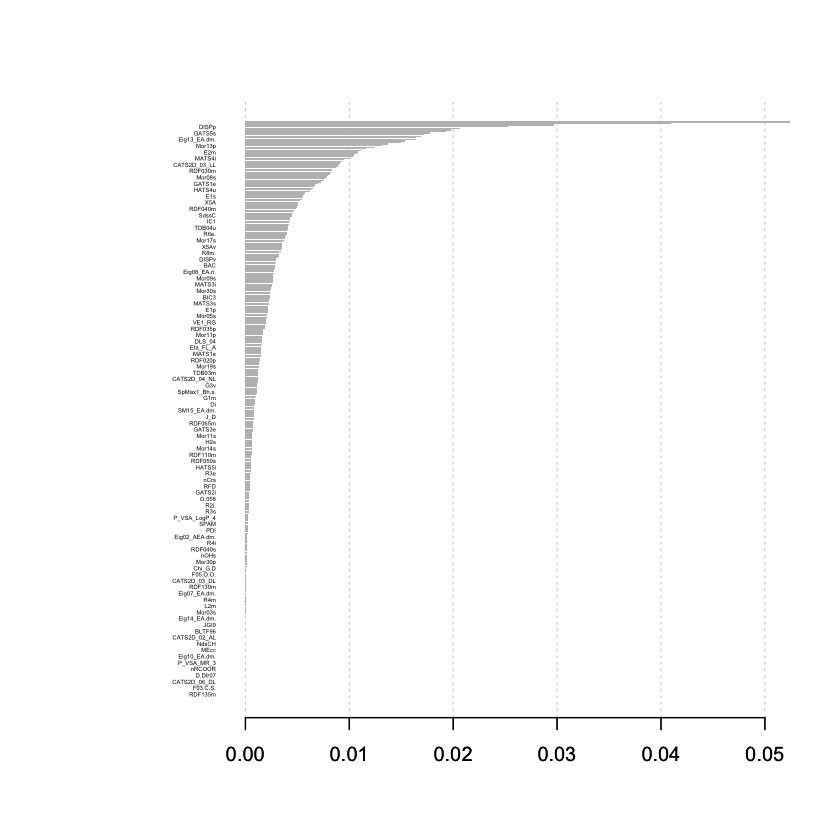

In [267]:
xgb.plot.importance(xgb.importance(model = boost.pleas))


We can see the more important predictor for the boosting model


Boosting Tree is not the method with the lowest test MSE, therefore, it is the best prediction method we found for this project based on our result with the test_data. 

Indeed, the best post on Kaggle is based on xgboost model, howerver we initially did not design a specific seed when we ran our model. Consequently, the model presented here does not correspond to the best one we had. 


In [272]:
Data.kaggle1<- read.csv(file.path("..","data","test_data.csv"))
lookup <- c("low" = 1, "high" = 0)
Data.kaggle1$Intensity <- lookup[Data.kaggle1$Intensity]




Data.kaggle<-Data.kaggle1[, colnames(Data.kaggle1)%in%colnames(plea.train.x)]

Data.kaggle.x <- xgb.DMatrix( data.matrix(Data.kaggle), missing = NA)
pred<-predict(boost.pleas, Data.kaggle.x)

result<- data.frame('Id'=Data.kaggle1$Id, 'VALENCE.PLEASANTNESS' = pred)
write.csv(x=result, 'boosting.csv', row.names = FALSE )